# Raster Analysis

In [45]:
import rasterio
from matplotlib import pyplot
import rioxarray
import geopandas
import rasterstats

## Reading in a tiff

In [51]:
#raster_in = 'L:\\Public\\jbousqui\\Code\\GitHub\\Python_OpenSource_GIS\\extdata\\NLCD_2021_Tree_Canopy_mulino.tif'
raster_in = 'https://github.com/jbousquin/Python_OpenSource_GIS/raw/main/extdata/NLCD_2021_Tree_Canopy_mulino.tif'

In [52]:
canopy = rasterio.open(raster_in)
type(canopy)

rasterio.io.DatasetReader

In [42]:
# Has shape of grid
canopy.shape

(25, 25)

In [44]:
# Has spatial information for grid as a whole not individual grid cells
canopy.bounds

BoundingBox(left=-2059275.0, bottom=2759745.0, right=-2058525.0, top=2760495.0)

In [30]:
canopy.close()  # Good house-keeping

In [26]:
# A raster dataset can be multi-band, each accessed by the band's index starting at 1
with rasterio.open(raster_in) as src:
        image = src.read(1) # first band as array

In [32]:
# note same shape
image.shape

(25, 25)

In [17]:
# As an array, you can see each cell has an integer value 0-100
image

array([[ 0,  0, 43, 70, 52, 14, 18, 36, 55, 65, 73, 56, 28, 16,  0,  0,
         0,  0,  0,  0,  0, 73, 42,  0,  0],
       [ 0,  0, 43, 73, 62, 18, 24, 27, 65, 69, 67, 33,  0,  0,  0,  0,
         0,  0,  0,  0, 22, 59, 37,  5,  0],
       [ 0,  0, 34, 71, 70, 36, 39, 66, 69, 63, 21,  0,  0, 13, 29,  0,
         0,  0,  0,  0,  0,  0, 17, 36,  0],
       [ 0, 11, 22, 45, 45,  0, 64, 68, 66, 33,  0,  0,  0, 26, 15,  0,
         0,  0,  0,  0,  0,  0, 39, 50,  0],
       [ 6,  6,  9,  0, 25,  0, 31, 32, 34, 32,  0,  0,  0, 11,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  7,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 21, 32, 32, 23,  0,  0,  0,  0,
         0,  0,  0, 21,  0,  0, 13,  0,  0],
       [ 0,  0,  0,  0,  0, 18, 16, 12, 11,  0, 27, 22,  0,  0,  0,  0,
         0,  0, 17, 25, 13,  9, 19,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  7,  6,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0, 27, 22, 29],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 

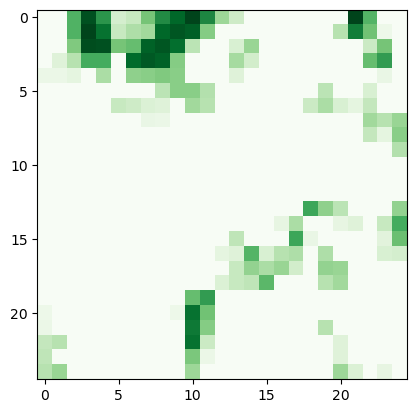

In [47]:
# Quick plot
pyplot.imshow(image, cmap='Greens')

### Writing to local file

In [54]:
src = rasterio.open(raster_in)
out_file = r'C:\Users\jbousqui\Local_GIS\temp_test\OS_canopy_example.tif'

In [57]:
with rasterio.open(out_file, 'w') as dst:
    dst.write(src)

TypeError: Integer width and height are required.

In [55]:
# Register GDAL format drivers and configuration options with a
# context manager.
with rasterio.Env():

    # Write an array as a raster band to a new 8-bit file. For
    # the new file's profile, we start with the profile of the source
    profile = src.profile

    # And then change the band count to 1, set the
    # dtype to uint8, and specify LZW compression.
    profile.update(
        dtype=rasterio.uint8,
        count=1,
        compress='lzw')

    with rasterio.open(out_file, 'w', **profile) as dst:
        dst.write(array.astype(rasterio.uint8), 1)

# At the end of the ``with rasterio.Env()`` block, context
# manager exits and all drivers are de-registered.

NameError: name 'array' is not defined

## Raster to Raster Analysis

In [ ]:
# Based on the combination of the data in the array and the spatial bounds can be used to extract/manipulate specific values,
#but 

In [ ]:
xarray

## Raster to vector Analysis

In [ ]:
# Raster to vector methods

In [ ]:
#rioxarray clip

In [ ]:
#rasterstats
from rasterstats import zonal_stats, point_query
stats = zonal_stats('tests/data/polygons.shp', 'tests/data/slope.tif')
pts = point_query('tests/data/points.shp', 'tests/data/slope.tif')

In [ ]:
# Writing a result

In [ ]:
# Register GDAL format drivers and configuration options with a
# context manager.
with rasterio.Env():

    # Write an array as a raster band to a new 8-bit file. For
    # the new file's profile, we start with the profile of the source
    profile = src.profile

    # And then change the band count to 1, set the
    # dtype to uint8, and specify LZW compression.
    profile.update(
        dtype=rasterio.uint8,
        count=1,
        compress='lzw')

    with rasterio.open('example.tif', 'w', **profile) as dst:
        dst.write(array.astype(rasterio.uint8), 1)